In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
type(y), y.shape, tx.shape, y.shape[0], weight


(numpy.ndarray,
 (10000,),
 (10000, 2),
 10000,
 array([ 109.81967768,   73.68895452,   96.58434842, ...,   58.32779473,
          74.38901745,   51.59669261]))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [4]:

def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    normalization = 1/(2*y.shape[0])
    yy = np.array([y]).T

    MSE = normalization * np.sum(np.power( yy - np.dot(tx, w), 2))
    return MSE
    raise NotImplementedError    

compute_loss(np.array([100, 50]), np.array([[1, 10], [1, 10]]), np.array([[1],[0.1]]))

2977.0

# Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(0, len(w0)):
        for j in range(0, len(w1)):
            w = np.array([[w0[i]],[w1[j]]])
            losses[i,j] = compute_loss(y, tx, w)
    return losses
    raise NotImplementedError
    
# grid_search(y, tx, [-100], [-150])

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=4.268 seconds


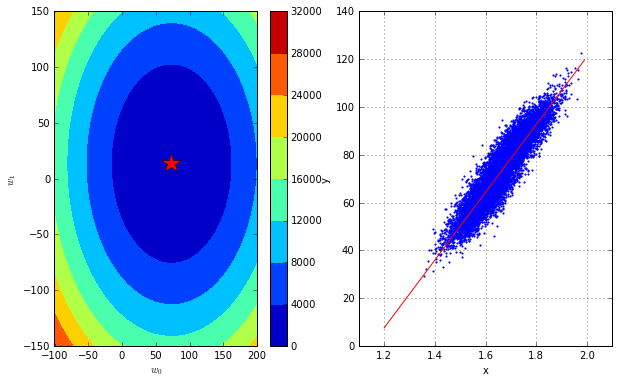

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)
# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    N = y.shape[0]
    yy = np.array([y]).T
    normalization = -1/N
    der_w0 = normalization * np.sum((yy - np.dot(tx, w)))
    der_w1 = normalization * np.dot(np.array([tx[:,1]]), yy - np.dot(tx, w) )[0][0]

    gradient = np.array([[der_w0], [der_w1]])
    return gradient
    raise NotImplementedError
    
# compute_loss(np.array([100, 50]), np.array([[1, 10], [1, 10]]), np.array([[1],[0.1]]))
compute_gradient(np.array([100, 50]), np.array([[1, 10], [1, 10]]), np.array([[1],[0.1]]))

array([[ -73.],
       [-730.]])

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - (gamma * gradient)
        #raise NotImplementedError
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)

        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws
# compute_gradient(np.array([100, 50]), np.array([[1, 10], [1, 10]]), np.array([[1],[0.1]]))
gradient_descent(np.array([100, 50]), np.array([[1, 10],[1, 10]]), np.array([[1], [0.1]]), 1, 1)

Gradient Descent(0/0): loss=2977.0, w0=[ 74.], w1=[ 730.1]


([2977.0], [array([[ 1. ],
         [ 0.1]]), array([[  74. ],
         [ 730.1]])])

Test your gradient descent function through gradient descent demo shown below:

In [9]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 45
gamma = 0.4

# Initialization
w_initial = np.array([[-10.0], [10.0]])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/44): loss=3490.378808430329, w0=[ 23.3175688], w1=[ 11.39188497]
Gradient Descent(1/44): loss=1266.3833392709696, w0=[ 43.30811008], w1=[ 12.22701596]
Gradient Descent(2/44): loss=465.7449703735998, w0=[ 55.30243485], w1=[ 12.72809455]
Gradient Descent(3/44): loss=177.5151575705468, w0=[ 62.49902971], w1=[ 13.0287417]
Gradient Descent(4/44): loss=73.75242496144766, w0=[ 66.81698663], w1=[ 13.20913]
Gradient Descent(5/44): loss=36.39784122217194, w0=[ 69.40776078], w1=[ 13.31736297]
Gradient Descent(6/44): loss=22.95019107603272, w0=[ 70.96222527], w1=[ 13.38230276]
Gradient Descent(7/44): loss=18.109037023422587, w0=[ 71.89490396], w1=[ 13.42126663]
Gradient Descent(8/44): loss=16.366221564482952, w0=[ 72.45451118], w1=[ 13.44464495]
Gradient Descent(9/44): loss=15.738807999264683, w0=[ 72.79027551], w1=[ 13.45867194]
Gradient Descent(10/44): loss=15.512939115786098, w0=[ 72.99173411], w1=[ 13.46708814]
Gradient Descent(11/44): loss=15.431626317733812, w0=[ 73.112609

<function __main__.plot_figure>

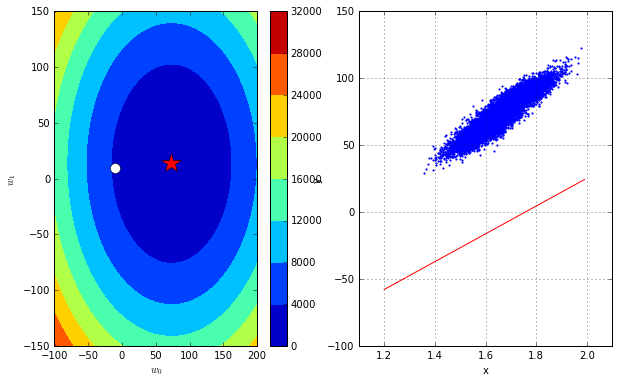

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [15]:
def compute_stoch_gradient(y, tx, w, batch_size):
    """Compute a stochastic gradient for batch data."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.
    # ***************************************************
    gradient_sum = np.array([[0.0],[0.0]])
    for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
        grad = compute_gradient(minibatch_y, minibatch_tx, w)
        #print(grad)
        gradient_sum += grad
        #stoch_loss = compute_loss(minibatch_y, minibatch_tx, w)
    return (1/batch_size) * grad
    raise NotImplementedError

grad = compute_stoch_gradient(y, tx, np.array([[0.0], [0.0]]), 1)
print(grad)

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    #
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_epochs):
        gradient = compute_stoch_gradient(y, tx, w, batch_size)
#         print(gradient)
        loss = compute_loss(y, tx, w)
        w = w - (gamma * gradient)
        #raise NotImplementedError
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)

        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    #
    return losses, ws
    raise NotImplementedError
    

[[-51.32165827]
 [ 59.6526038 ]]


In [16]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([[0.0], [0.0]])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2792.2367127591674, w0=[ 34.28234808], w1=[ 27.24687796]
Stochastic Gradient Descent(1/49): loss=871.1047612399365, w0=[ 48.99663306], w1=[ 37.41600087]
Stochastic Gradient Descent(2/49): loss=597.0379647305028, w0=[ 66.56121506], w1=[ 21.95440662]
Stochastic Gradient Descent(3/49): loss=73.96078002404307, w0=[ 78.0924034], w1=[ 5.43016441]
Stochastic Gradient Descent(4/49): loss=59.29621140226131, w0=[ 73.19649238], w1=[ 7.09393419]
Stochastic Gradient Descent(5/49): loss=35.77971602623955, w0=[ 73.59662292], w1=[ 7.53047285]
Stochastic Gradient Descent(6/49): loss=33.12842763519416, w0=[ 73.68605326], w1=[ 7.55750757]
Stochastic Gradient Descent(7/49): loss=32.99902657668415, w0=[ 74.12287737], w1=[ 8.00570502]
Stochastic Gradient Descent(8/49): loss=30.71184997270235, w0=[ 71.95944588], w1=[ 9.81307072]
Stochastic Gradient Descent(9/49): loss=22.998431856681687, w0=[ 74.8530332], w1=[ 14.25104385]
Stochastic Gradient Descent(10/49): loss=16.89

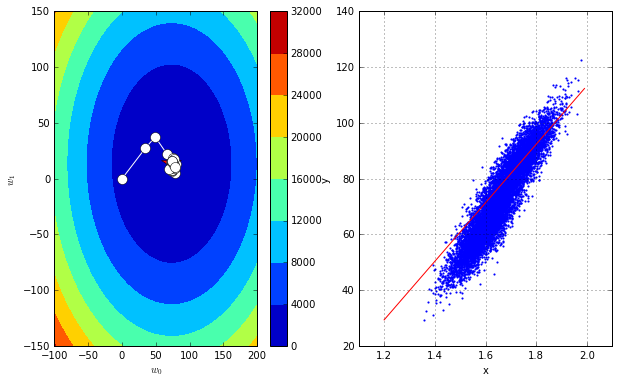

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))